In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import colormaps


In [19]:
ISH = pd.read_csv('../CleanData/ISH_summary.csv', index_col=0)
BOM = pd.read_csv('../CleanData/BOM_summary.csv', index_col=0)
cr_chapter = pd.read_csv('../CleanData/by_chapter_cross_ref.csv', index_col=0)
cr_verse = pd.read_csv('../CleanData/by_verse_cross_ref.csv', index_col=0)

## By Isaiah Chapter statistics

In [20]:
ISH_count_ref = pd.melt(ISH, id_vars= ['chapter_number_ISH', 'Duhms_Class', 'verse_count_ISH'],
                   value_vars=['Direct Quote', 'Shared Language', 'Similar Theme'], 
                   var_name='Ref_Type', value_name='Ref_Count')
ISH_count_ref['Ref_Prop'] = ISH_count_ref['Ref_Count']/ISH_count_ref['verse_count_ISH']


ISH_count_bible = ISH[['index', 'combo_ISH', 'chapter_number_ISH', 'Duhms_Class',
       'word_count_ISH', 'bible_term_in_ISH', 'verse_count_ISH']]
ISH_count_bible['bible_term_prop'] = ISH_count_bible['bible_term_in_ISH'] / ISH_count_bible['verse_count_ISH']


/var/folders/rb/6p7v7hb53b9g3qlshh4gmjp40000gn/T/ipykernel_12236/2089895586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISH_count_bible['bible_term_prop'] = ISH_count_bible['bible_term_in_ISH'] / ISH_count_bible['verse_count_ISH']


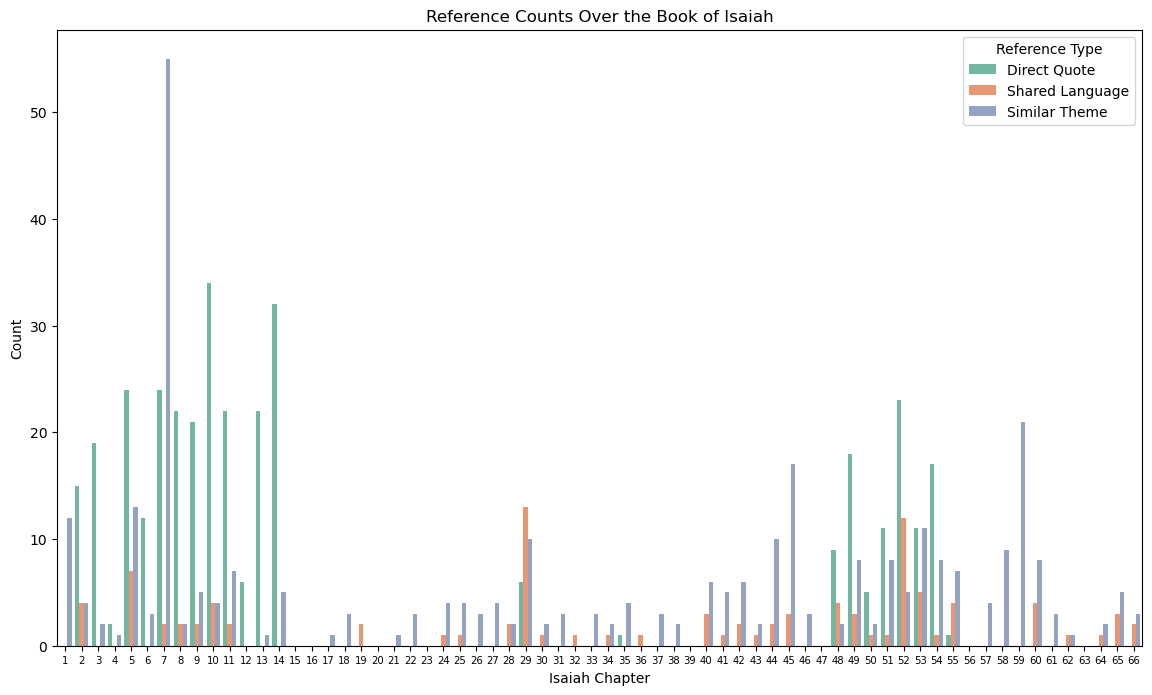

In [21]:
plt.figure(figsize=(14, 8))

b = sns.barplot(x = 'chapter_number_ISH', y = 'Ref_Count', hue = 'Ref_Type', palette = 'Set2', data = ISH_count_ref, order=ISH_count_ref["chapter_number_ISH"].unique())
plt.legend(title = 'Reference Type')
b.set_xticklabels(b.get_xticks()+1, size=7.25)
plt.title('Reference Counts Over the Book of Isaiah')
plt.xlabel('Isaiah Chapter')
plt.ylabel('Count')

plt.savefig("../Visuals/Graphs/ref_count_ISH.png", dpi = 300)

plt.show()



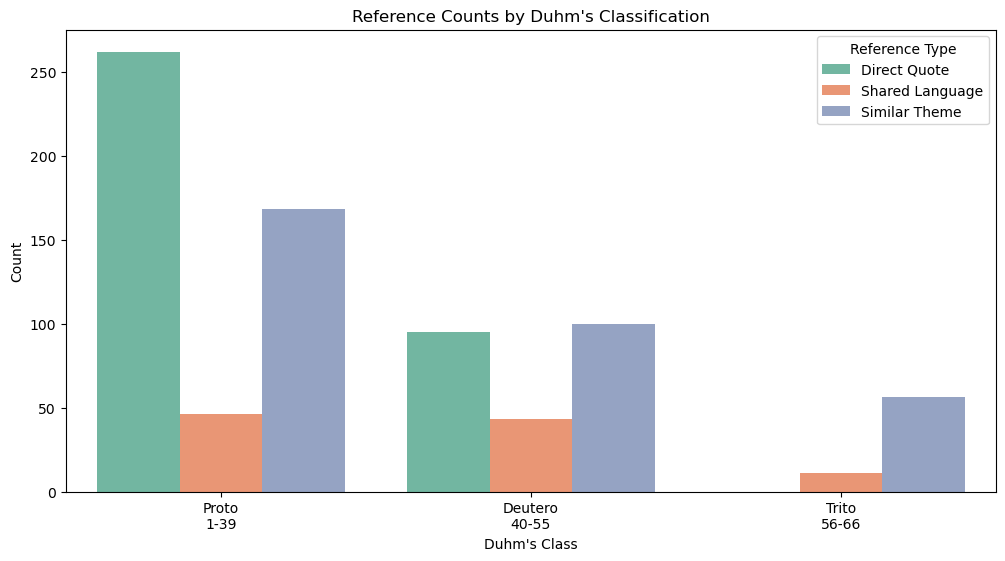

In [22]:
plt.figure(figsize=(12, 6))

br = sns.barplot(x = 'Duhms_Class', y = 'Ref_Count', hue='Ref_Type', data = ISH_count_ref, 
            estimator=sum, dodge=True, errorbar=None, palette='Set2')
br.set_xticklabels(['Proto\n1-39', 'Deutero\n40-55', 'Trito\n56-66'])
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'

# ax.set_xticklabels(labels)

plt.title("Reference Counts by Duhm's Classification")
plt.legend(title = "Reference Type")
plt.xlabel("Duhm's Class")
plt.ylabel("Count")

plt.savefig("../Visuals/Graphs/ref_count_DUHMs", dpi = 200)

plt.show()


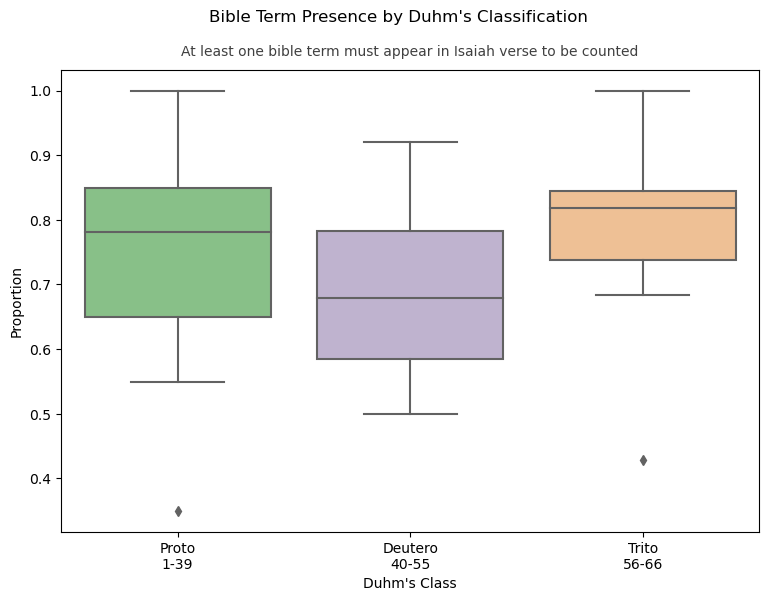

In [23]:
plt.figure(figsize=(9, 6))

bx = sns.boxplot(x = 'Duhms_Class', y = 'bible_term_prop', palette='Accent', data = ISH_count_bible)
bx.set_xticklabels(['Proto\n1-39', 'Deutero\n40-55', 'Trito\n56-66'])
plt.suptitle("Bible Term Presence by Duhm's Classification")
plt.title(' ')
plt.text(x=1, y=1.05, s='At least one bible term must appear in Isaiah verse to be counted', fontsize=10, alpha=0.75, ha='center', va='bottom')
plt.xlabel("Duhm's Class")
plt.ylabel("Proportion")

plt.savefig("../Visuals/Graphs/bd_DUHMS.png", dpi = 200)

plt.show()



## By BOM Chapter Statistics

In [24]:
BOM_count_ref = pd.melt(BOM, id_vars= ['combo_BOM', 'book_title_BOM', 'chapter_number_BOM', 'verse_count_BOM'],
                   value_vars=['Direct Quote', 'Shared Language', 'Similar Theme'], 
                   var_name='Ref_Type', value_name='Ref_Count')
BOM_count_ref['Ref_Prop'] = BOM_count_ref['Ref_Count']/BOM_count_ref['verse_count_BOM']

BOM_count_bible = BOM[['combo_BOM', 'book_title_BOM', 'chapter_number_BOM',
       'word_count_BOM', 'bible_term_in_BOM', 'verse_count_BOM']]
BOM_count_bible['bible_term_prop'] = BOM_count_bible['bible_term_in_BOM'] / BOM_count_bible['verse_count_BOM']

/var/folders/rb/6p7v7hb53b9g3qlshh4gmjp40000gn/T/ipykernel_12236/690390043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOM_count_bible['bible_term_prop'] = BOM_count_bible['bible_term_in_BOM'] / BOM_count_bible['verse_count_BOM']


/Users/jacksonpassey/anaconda3/envs/stat386/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


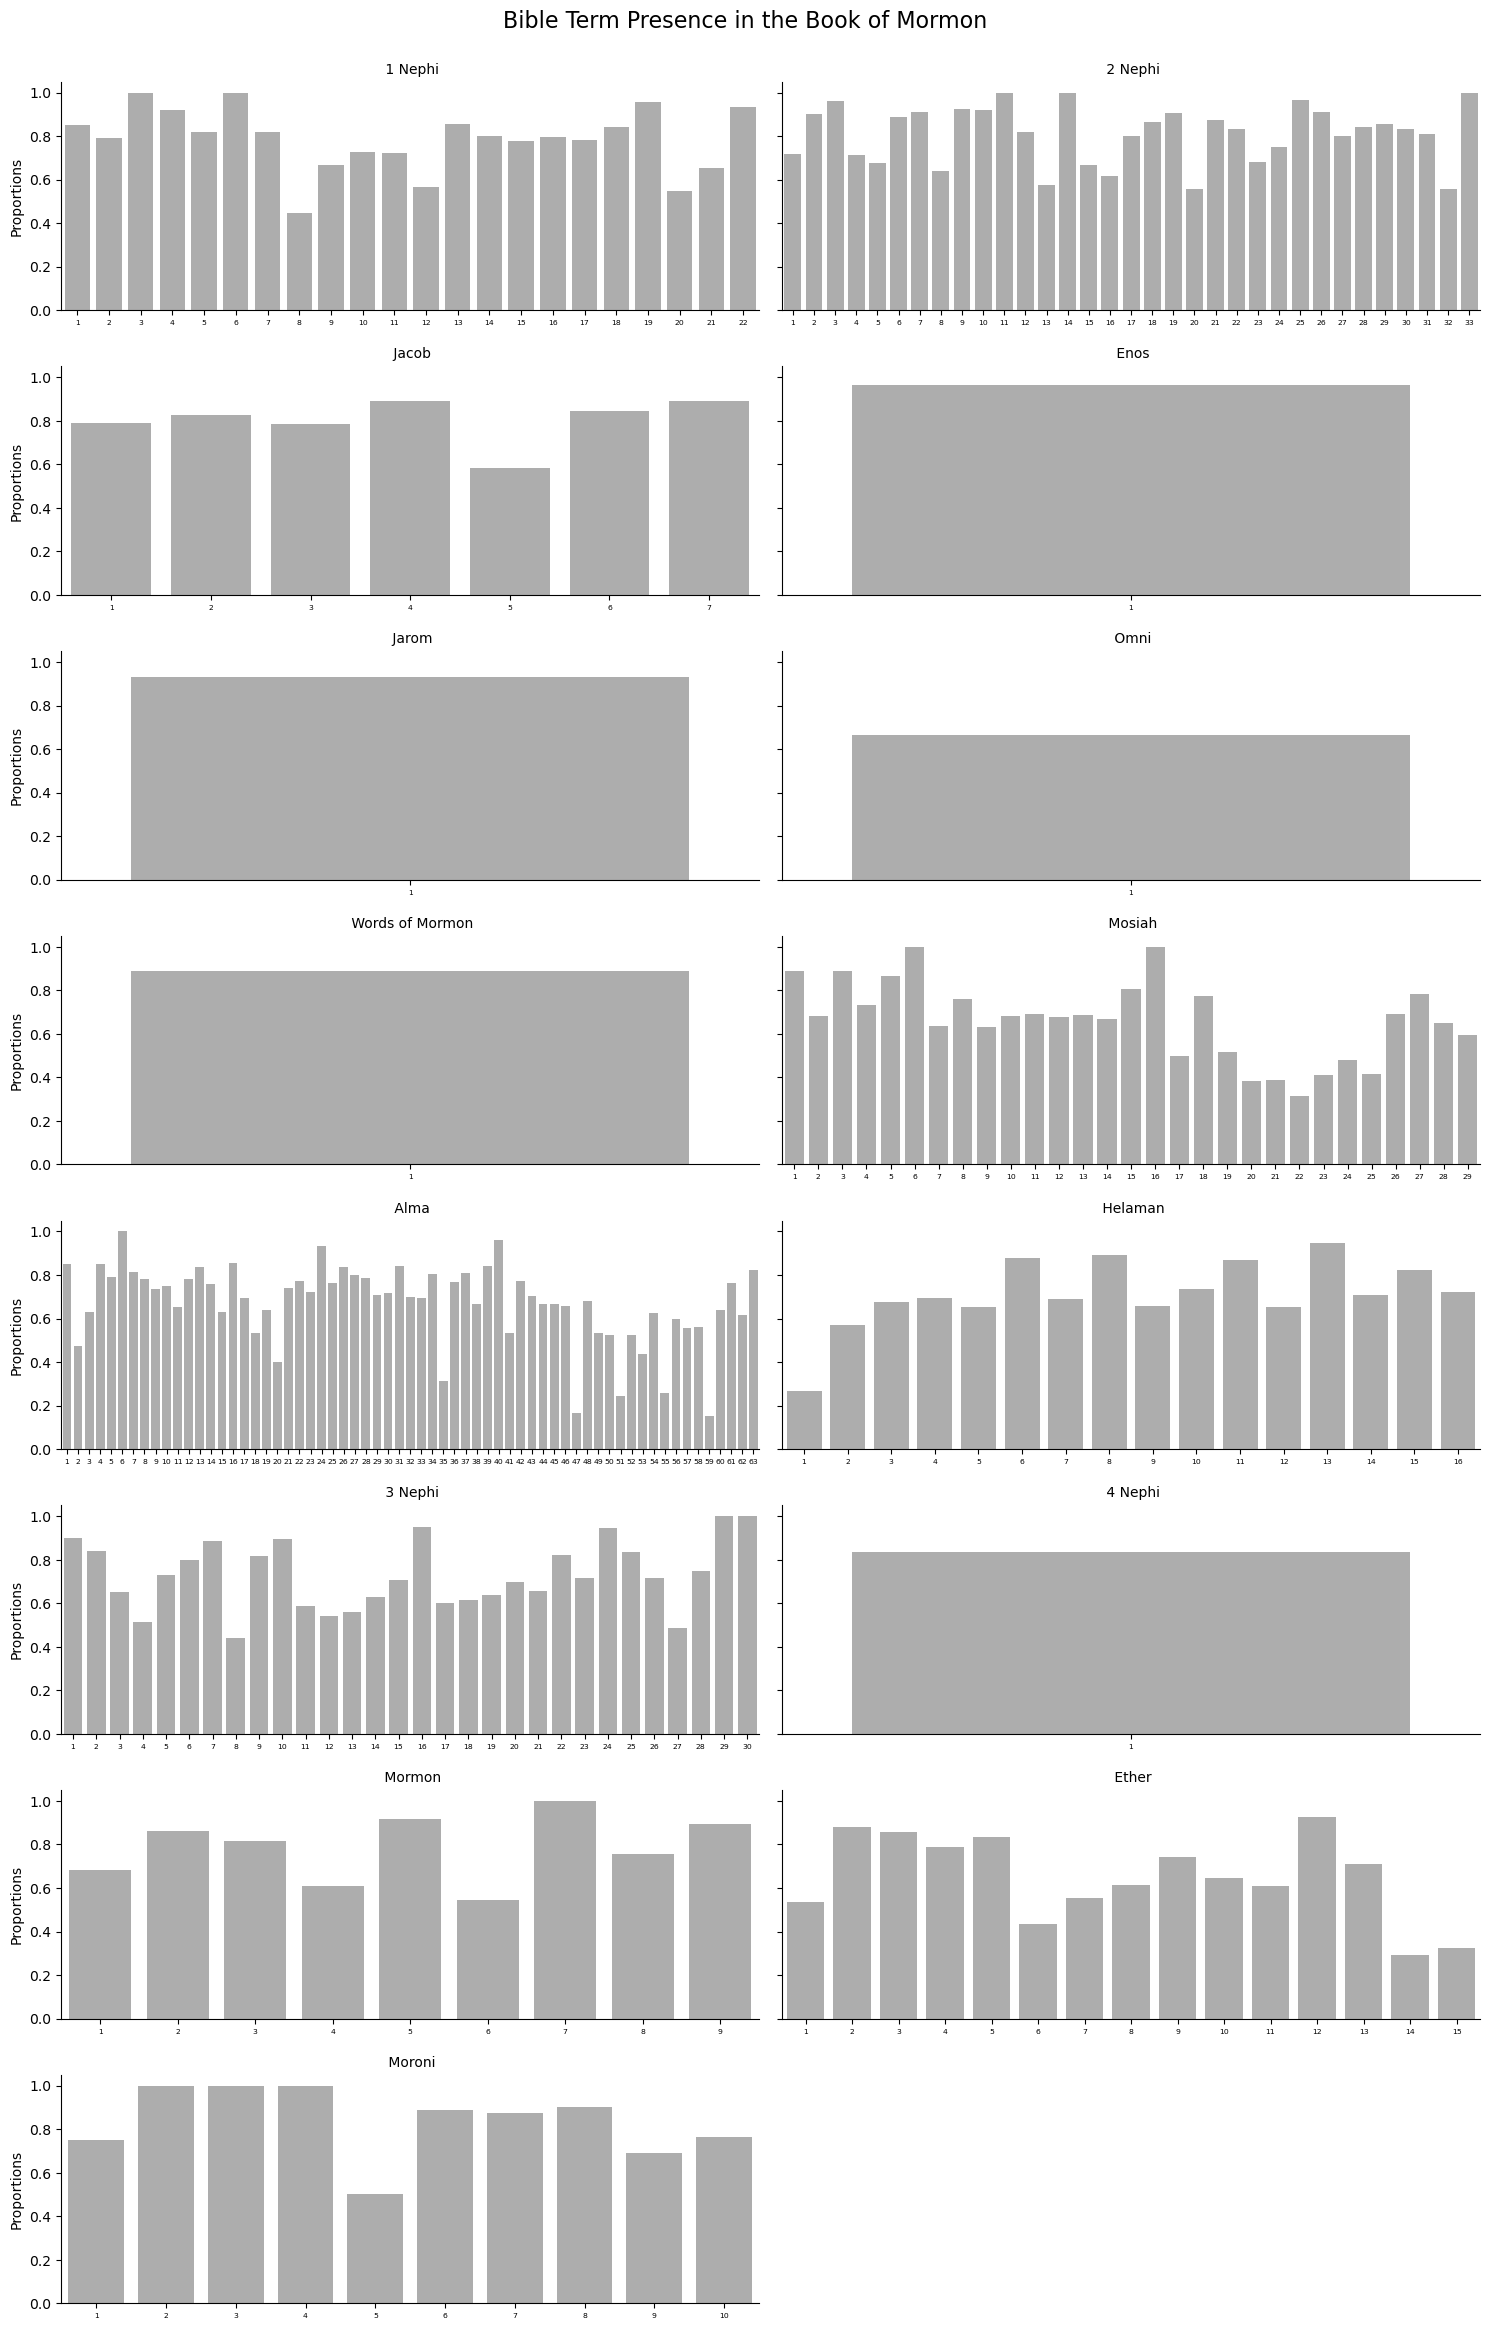

In [25]:
# Initiate facet grid
bom_bp = sns.FacetGrid(data = BOM_count_bible, col='book_title_BOM', col_wrap=2, sharex=False, aspect = 2.5)

# Write barplot
bom_bp.map(sns.barplot, 'chapter_number_BOM', 'bible_term_prop', color = sns.color_palette('Greys').as_hex()[2])

bom_bp.set_titles("\n {col_name}")
bom_bp.set_axis_labels(x_var="", y_var="Proportions")
bom_bp.set_xticklabels(size = 5.5)

bom_bp.figure.suptitle("Bible Term Presence in the Book of Mormon", size=16)
bom_bp.figure.subplots_adjust(top=.95)

plt.savefig("../Visuals/Graphs/bd_BOM.png", dpi = 500)

plt.show()


/Users/jacksonpassey/anaconda3/envs/stat386/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/jacksonpassey/anaconda3/envs/stat386/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


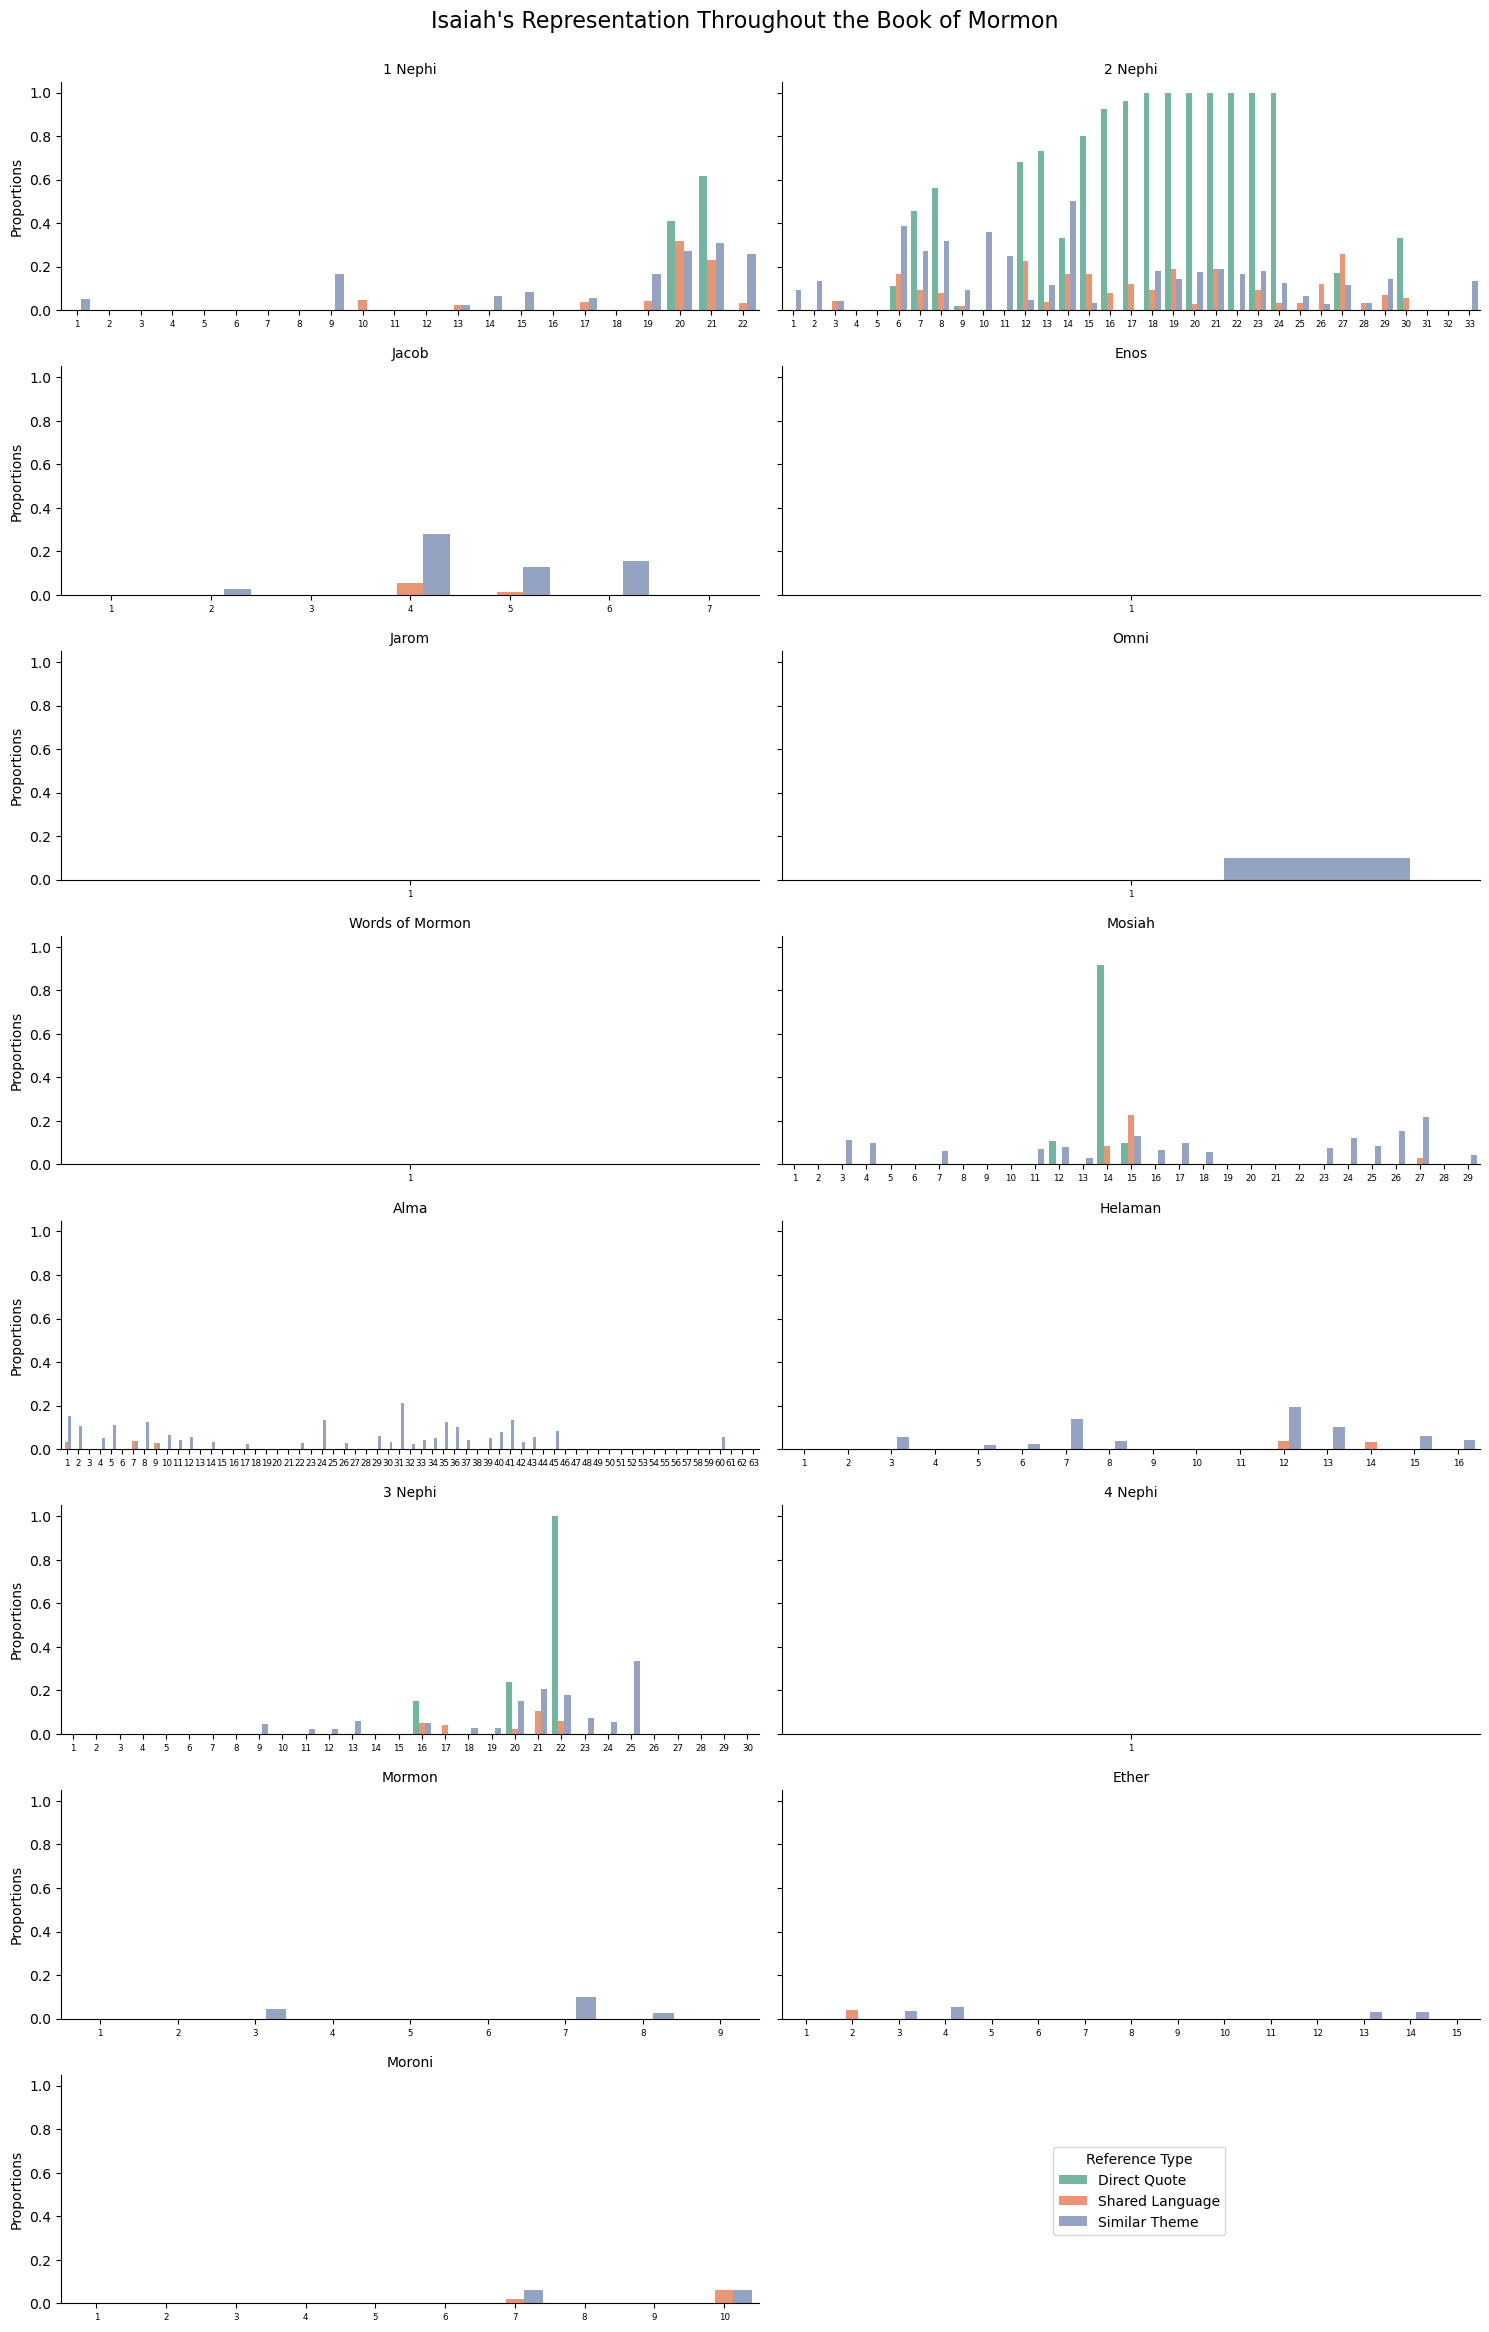

In [26]:
# Initiate facet grid
bom_cr = sns.FacetGrid(data = BOM_count_ref, col='book_title_BOM', col_wrap=2, sharex=False, legend_out=False, aspect = 2.5)

# Write barplot
bom_cr.map(sns.barplot, 'chapter_number_BOM', 'Ref_Prop', 'Ref_Type', dodge = True, palette='Set2').add_legend()

bom_cr.set_titles("{col_name}")
bom_cr.set_axis_labels(x_var="", y_var="Proportions")
bom_cr.set_xticklabels(size = 6.25)

sns.move_legend(bom_cr, loc = "lower right", bbox_to_anchor = (.825,.05))
bom_cr.legend.set_title('Reference Type')

bom_cr.figure.suptitle("Isaiah's Representation Throughout the Book of Mormon", size=16)
bom_cr.figure.subplots_adjust(top=.95)

plt.savefig("../Visuals/Graphs/ref_count_BOM.png", dpi = 500)

plt.show()




## Cross-Chapter Graphics

In [27]:
cr_bible_tot = pd.merge(cr_chapter, ISH[['combo_ISH','bible_term_in_ISH', 'verse_count_ISH']], on = 'combo_ISH')
cr_bible_tot = pd.merge(cr_bible_tot, BOM[['combo_BOM','bible_term_in_BOM', 'verse_count_BOM']], on = 'combo_BOM')
cr_bible_tot.reset_index(inplace=True)

cr_bible_tot2 = pd.melt(cr_bible_tot, id_vars=['combo_ISH', 'combo_BOM', 'Duhms_Class', 'verse_count_ISH', 'verse_count_BOM'], 
                            value_vars=['bible_term_in_BOM', 'bible_term_in_ISH'], # need also verse_counts and chapter
                            var_name='Book', 
                            value_name='Bible_Term_Count').melt( 
                                id_vars=['combo_ISH', 'combo_BOM', 'Duhms_Class', 'Book', 'Bible_Term_Count'], 
                                value_vars=['verse_count_ISH', 'verse_count_BOM'], # need also verse_counts and chapter
                                var_name='Book2', 
                                value_name='Verse_Count').melt( 
                                    id_vars=['Duhms_Class', 'Book', 'Bible_Term_Count', 'Book2', 'Verse_Count'], 
                                    value_vars=['combo_ISH', 'combo_BOM'],
                                    var_name='Book3', 
                                    value_name='Book_Combo')

cr_bible_tot2['Book'] = cr_bible_tot2['Book'].apply(lambda x: "BOM" if 'BOM' in x else ("ISH" if 'ISH' in x else x))

cr_bible_tot2 = cr_bible_tot2.loc[ ( (cr_bible_tot2['Book'].str.contains("BOM")) & (cr_bible_tot2['Book2'].str.contains("BOM")) & (cr_bible_tot2['Book3'].str.contains("BOM")) ) | 
                   ( (cr_bible_tot2['Book'].str.contains("ISH")) & (cr_bible_tot2['Book2'].str.contains("ISH")) & (cr_bible_tot2['Book3'].str.contains("ISH")) ) ].drop(
                       ['Book2','Book3'], axis=1
                       ).drop_duplicates()

cr_bible_tot2['bible_term_prop'] = cr_bible_tot2['Bible_Term_Count']/cr_bible_tot2['Verse_Count']

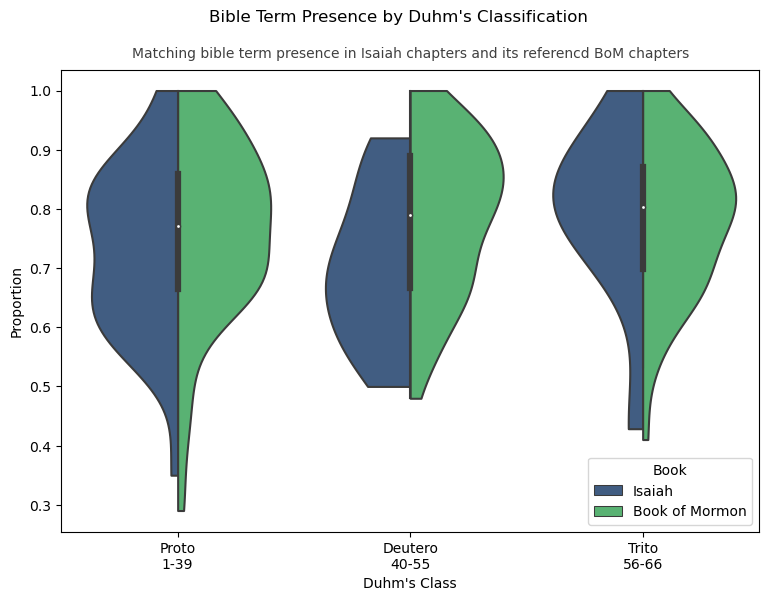

In [28]:
pal = sns.color_palette('viridis').as_hex()
idx = [1,4]
vl_cols = [pal[i] for i in idx]
book_labels = ['Isaiah', 'Book of Mormon']
plt.figure(figsize=(9, 6))

vl = sns.violinplot(x = 'Duhms_Class', y = 'bible_term_prop', hue='Book', split=True, cut=0, palette=vl_cols, data = cr_bible_tot2)
vl.set_xticklabels(['Proto\n1-39', 'Deutero\n40-55', 'Trito\n56-66'])
plt.suptitle("Bible Term Presence by Duhm's Classification")
plt.title(' ')
plt.text(x=1, y=1.05, s='Matching bible term presence in Isaiah chapters and its referencd BoM chapters', fontsize=10, alpha=0.75, ha='center', va='bottom')
plt.xlabel("Duhm's Class")
plt.ylabel("Proportion")
h, l = vl.get_legend_handles_labels()
vl.legend(h, book_labels, title="Book", loc = "lower right")

plt.savefig("../Visuals/Graphs/bd_comp.png", dpi = 200)

plt.show()

## By Verse Graphics

In [29]:
ISH_verses = cr_verse.drop_duplicates('verse_title_ISH')
ISH_verses.dropna(subset=['scripture_cleaned_ISH'], inplace=True)
text = ISH_verses.groupby('Duhms_Class')['scripture_text_ISH'].agg(lambda x: ' '.join(x)).reset_index()

Stopwords = STOPWORDS
Stopwords.update(['thy', 'thee', 'thou', 'ye', 'thine', 'hath', 'yea', 'hast'])

/var/folders/rb/6p7v7hb53b9g3qlshh4gmjp40000gn/T/ipykernel_12236/3895647928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISH_verses.dropna(subset=['scripture_cleaned_ISH'], inplace=True)


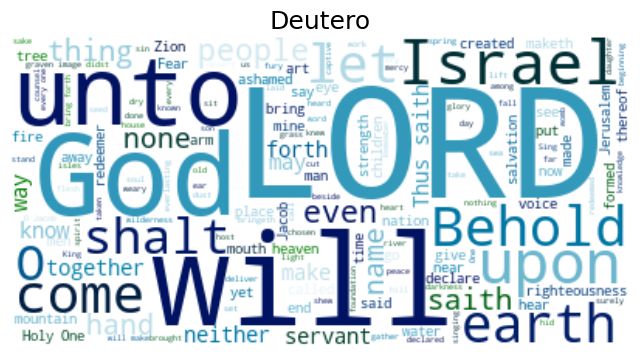

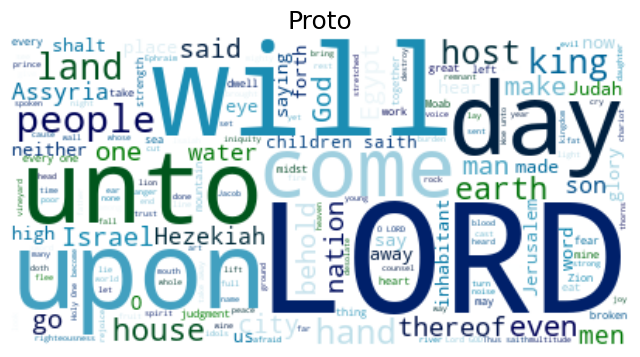

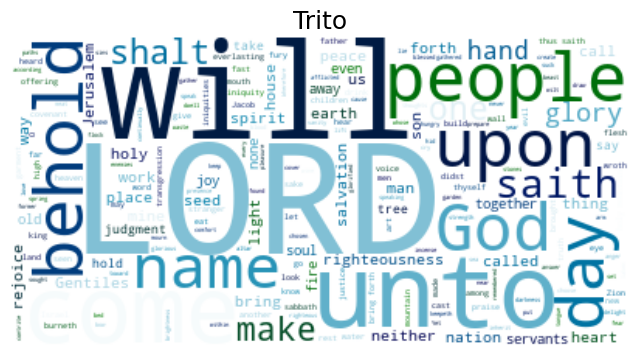

In [30]:

# Create and generate a word cloud image:
for index, row in text.iterrows():
    wordcloud = WordCloud(stopwords = Stopwords, max_font_size=100, background_color="white", colormap='ocean').generate(row.scripture_text_ISH)
    
    plt.figure(figsize=(8, 6))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{row.Duhms_Class}", fontsize = 18)

    plt.savefig(f"../Visuals/Graphs/wordcloud_{row.Duhms_Class}", dpi = 150)

    plt.show()

/var/folders/rb/6p7v7hb53b9g3qlshh4gmjp40000gn/T/ipykernel_12236/847553136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOM_verses.dropna(subset=['scripture_cleaned_BOM'], inplace=True)


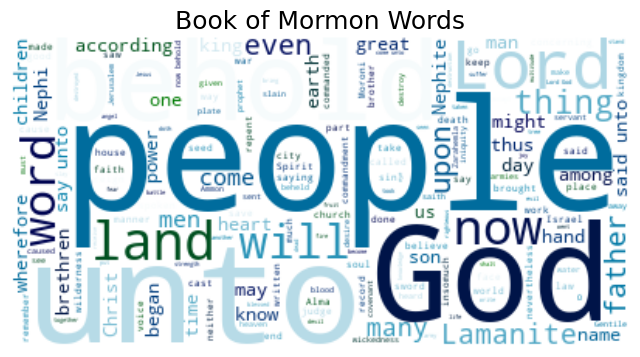

In [31]:
BOM_verses = cr_verse.drop_duplicates('verse_title_BOM')
BOM_verses.dropna(subset=['scripture_cleaned_BOM'], inplace=True)
text = " ".join(verse for verse in BOM_verses.scripture_text_BOM)

Stopwords2 = Stopwords
Stopwords2.update(['came', 'pass'])

wordcloud = WordCloud(stopwords = Stopwords2, max_font_size=100, background_color="white", colormap='ocean').generate(text)
    
plt.figure(figsize=(8, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Book of Mormon Words", fontsize = 18)

plt.savefig("../Visuals/Graphs/wordcloud_BOM.png", dpi = 150)

plt.show()

In [40]:
# count bible term word occurances in the Book of Mormon

pd.DataFrame(cr_verse['bible_term_name_BOM'].value_counts())


,bible_term_name_BOM
lord,865
god,635
year,297
u,130
church,130
...,...
manna,1
pharaoh,1
bethabara,1
bath,1


In [41]:
# ... and Isaiah

pd.DataFrame(cr_verse['bible_term_name_ISH'].value_counts())

,bible_term_name_ISH
lord,398
god,46
house,41
let,39
zion,35
...,...
vulture,1
zebulun,1
hart,1
disciple,1
